In [19]:
import numpy as np
from scipy.misc import derivative
import matplotlib.pyplot as plt
from sympy import *

A graph with the equation 

$$ f(x,y) = - x^2 - y^2  $$

In [20]:
def f(x,y):
    return -x**2-y**2

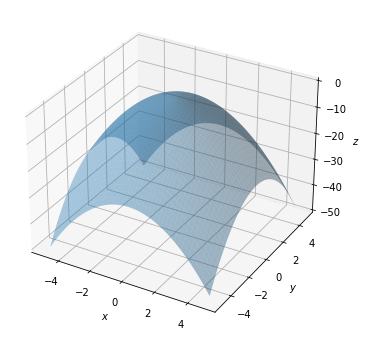

In [21]:
plt.figure(figsize=(6,6))

ax = plt.axes(projection="3d")

x = np.arange(-5,5,0.1)
y = np.arange(-5,5,0.1)

X,Y = np.meshgrid(x,y)
Z = f(X,Y)

ax.plot_surface(X,Y,Z, alpha = 0.4)
plt.xlabel('$x$')
plt.ylabel('$y$')
ax.set_zlabel('$z$')

plt.show()

In [22]:
# The partial derivatives

var('x y z')

F = 1-x**2-y**2
print(F.diff(x)) 
print(F.diff(y))

-2*x
-2*y


In [23]:
# A specific point p:

p = [1,1]
p.append(f(p[0],p[1]))
p

[1, 1, -2]

In [24]:
# The partial derivatives

def f_x(x,y):
    return -2*x

def f_y(x,y):
    return -2*y

print("The partial derivative with respect to x: ", f_x(p[0],p[1]))
print("The partial derivative with respect to x: ", f_y(p[0],p[1]))

The partial derivative with respect to x:  -2
The partial derivative with respect to x:  -2


In [25]:
# the tangent plane is
var('x y')

tangent_plane = f_x(p[0],p[1])*(x-p[0]) +f_y(p[0],p[1])*(y+p[1]) - p[2]
tangent_plane

-2*x - 2*y + 2

Text(0.5, 0, '$z$')

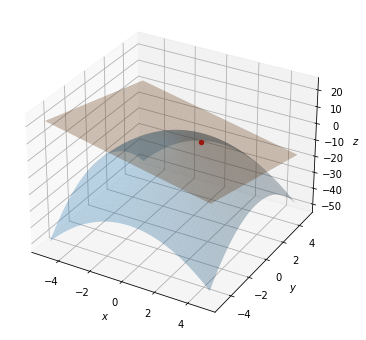

In [31]:
plt.figure(figsize=(6,6))

ax = plt.axes(projection="3d")

ax.plot_surface(X,Y,Z, alpha = 0.3)

ax.scatter3D(p[0],p[1],p[2], c='r')

Z_1 = -2*X-2*Y+2
ax.plot_surface(X,Y,Z_1, alpha = 0.3)

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")

#### A second example

In [32]:
def f(x,y):
    return x**2 + y**2

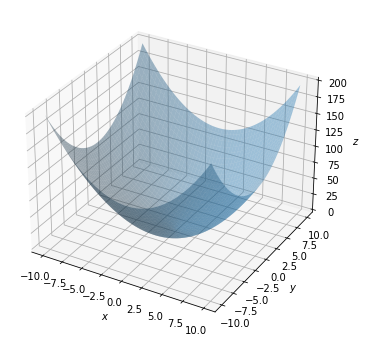

In [33]:
plt.figure(figsize=(6,6))

ax = plt.axes(projection="3d")

x = np.arange(-10,10,0.1)
y = np.arange(-10,10,0.1)

X,Y = np.meshgrid(x,y)
Z = f(X,Y)

ax.plot_surface(X,Y,Z, alpha = 0.4)

plt.xlabel('$x$')
plt.ylabel('$y$')
ax.set_zlabel('$z$')
plt.show()

In [34]:
# The partial derivatives

var('x y z')

F = x**2 + y**2
print(F.diff(x)) 
print(F.diff(y))

2*x
2*y


In [35]:
# A specific point p:

p = [1,1]
p.append(f(p[0],p[1]))
p

[1, 1, 2]

In [36]:
# The partial derivatives

def f_x(x,y):
    return 2*x

def f_y(x,y):
    return 2*y

print("The partial derivative with respect to x: ", f_x(p[0],p[1]))
print("The partial derivative with respect to x: ", f_y(p[0],p[1]))

The partial derivative with respect to x:  2
The partial derivative with respect to x:  2


In [37]:
# the tangent plane is
var('x y')

tangent_plane = f_x(p[0],p[1])*(x-p[0]) +f_y(p[0],p[1])*(y+p[1]) - p[2]
tangent_plane

2*x + 2*y - 2

Text(0.5, 0, '$z$')

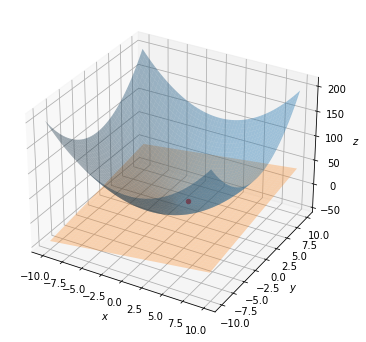

In [38]:
plt.figure(figsize=(6,6))

ax = plt.axes(projection="3d")

ax.plot_surface(X,Y,Z, alpha = 0.4)

ax.scatter3D(p[0],p[1],p[2], c='r')


Z_1 = 2*X + 2*Y - 2
ax.plot_surface(X,Y,Z_1, alpha = 0.3)

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")

# Maxima and minima

In [39]:
# Example

def f(x,y):
    return x**2  - 2*x*y + 3*y**2 + 2*x -2*y

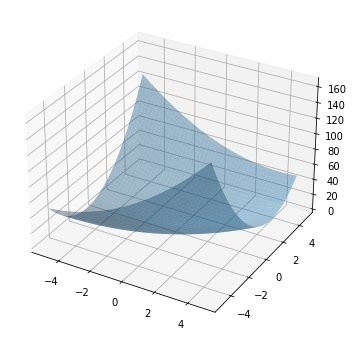

In [40]:
plt.figure(figsize=(6,6))

ax = plt.axes(projection="3d")

x = np.arange(-5,5,0.1)
y = np.arange(-5,5,0.1)

X,Y = np.meshgrid(x,y)
Z = f(X,Y)

ax.plot_surface(X,Y,Z, alpha=0.4)

In [45]:
# The partial derivatives
var('x y')

F = x**2  - 2*x*y + 3*y**2 + 2*x -2*y
f_x = F.diff(x)
f_y = F.diff(y)

In [46]:
f_x

2*x - 2*y + 2

In [47]:
f_y

-2*x + 6*y - 2

In [50]:
A = np.array([[2,-2],[-2,6]])
b = np.array([-2,2])

In [53]:
critic_poing = np.linalg.solve(A,b)
critic_poing

array([-1.,  0.])

In [58]:
critic_poing = np.append(critic_poing, f(critic_poing[0],critic_poing[1]))
critic_poing

array([-1.,  0., -1.])

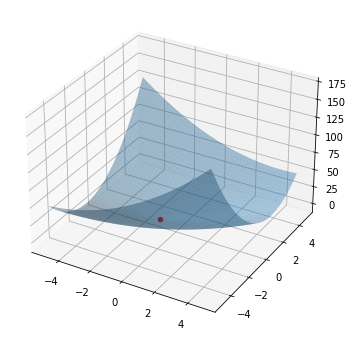

In [62]:
plt.figure(figsize=(6,6))

ax = plt.axes(projection="3d")

ax.plot_surface(X,Y,Z, alpha=0.4)

ax.scatter3D(critic_poing[0],critic_poing[1],critic_poing[2], color = 'r')

In [67]:
f = simplify(F)
f

x**2 - 2*x*y + 2*x + 3*y**2 - 2*y

In [70]:
expand(f)

x**2 - 2*x*y + 2*x + 3*y**2 - 2*y

# Least squares

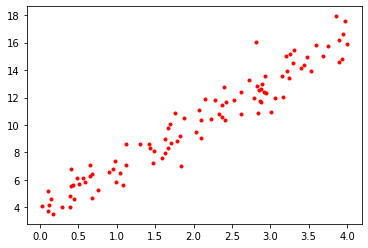

In [109]:
# Data

x = 4 * np.random.rand(100,1)
y = 4 + 3*x + np.random.randn(100,1)

plt.plot(x,y, ".", c='r')

In [110]:
x[:4]

array([[1.1231687 ],
       [2.72235715],
       [2.92428485],
       [2.40509588]])

In [111]:
def least_squares(X,y):
    # This function solves the least square problem using the formula
    beta_hat = np.linalg.inv(X.T@X)@X.T@y
    return beta_hat

In [112]:
X_b = np.c_[np.ones((100, 1)), x]  # add x0 = 1 to each instance
X_b[:4]

array([[1.        , 1.1231687 ],
       [1.        , 2.72235715],
       [1.        , 2.92428485],
       [1.        , 2.40509588]])

In [113]:
solution = least_squares(X_b,y)
solution

array([[3.80731351],
       [3.10931242]])

[]

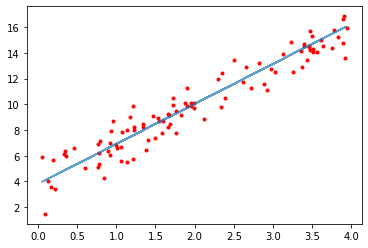

In [114]:
x = 4 * np.random.rand(100,1)
y = 4 + 3*x + np.random.randn(100,1)


plt.plot(x,y, ".", c='r')
plt.plot(x, solution[0]+solution[1]*x, alpha=0.7) # the solution is a+bx
plt.plot()